In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering

def CalculateYuleAndCosine(fpA, fpB):

    yule = DataStructs.DiceSimilarity(fpA, fpB)
    cosine = DataStructs.CosineSimilarity(fpA, fpB)
    
    return yule, cosine
    
def CalculateTversky(fp1_3d, fp2_3d, alpha = 1.0, beta = 1.5):
  
    intersection = DataStructs.TanimotoSimilarity(fp1_3d, fp2_3d)
    a = alpha * (fp1_3d.GetNumOnBits() - intersection)
    b = beta * (fp2_3d.GetNumOnBits() - intersection)
    
    tversky = intersection / (a + b - intersection)
    
    return tversky

def CalculateThreeDimTanimoto(fp1_3d, fp2_3d):

    sim = DataStructs.TanimotoSimilarity(fp1_3d, fp2_3d)
    return sim

def kmeans(matrix, min_k = 5, max_k = 20):

    inertias = []
    
    for i in range(min_k, max_k+1):
    
        kmean = KMeans(n_clusters = i, random_state = 42)
        kmean.fit(matrix)
        inertias.append(kmean.inertia_)
        
    return inertias

In [2]:
#df = pd.read_csv("/home/gudurkc2104/Desktop/ML Proj/modified_dset.csv")
df = pd.read_pickle("/home/gudurkc2104/Desktop/ML Proj/final_dset.pkl")

X = df[['smiles', 'Molecule', 'FingerPrint', 'FingerPrint_3d']]
Y = df['mpC']



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

no_mol = len(X_train)
print(no_mol)

2432


In [3]:
yule_matrix = np.zeros((no_mol, no_mol))
cosine_matrix = np.zeros((no_mol, no_mol))
tanimoto_matrix = np.zeros((no_mol, no_mol))
threed_matrix = np.zeros((no_mol, no_mol))

n = 0
if( no_mol%2 == 0): 
    n = int(no_mol/2)
else:
    n = int(no_mol/2) + 1

#X_train['Molecule'] = X_train['Molecule'].apply(ast.literal_eval)   
#fpA = X_train['FingerPrint'].apply(ast.literal_eval)
#df['Molecule'] = df['Molecule'].apply(lambda x: Chem.MolFromPickle(x) if x else None)
#df['Fingerprint'] = df['Fingerprint'].apply(lambda x: DataStructs.CreateFromBitString(x.ToBitString()) if x else None)

for i in range(n):
    #print(i, '\n\n')
    molA = X_train['Molecule'].iloc[i]
    fpA = X_train['FingerPrint'].iloc[i]
    fpA_3d = X_train['FingerPrint_3d'].iloc[i]
    if(molA is None):
        continue
    for j in range(no_mol):
        #print(j)
        if(i == j):
            continue
        else:
            molB = X_train['Molecule'].iloc[j]
            fpB = X_train['FingerPrint'].iloc[j]
            fpB_3d = X_train['FingerPrint_3d'].iloc[j]
            if(molB is None):
                continue
       
            yule_matrix[i][j], cosine_matrix[i][j] = CalculateYuleAndCosine(fpA, fpB)
            yule_matrix[i][j] = 1 - yule_matrix[i][j]
            cosine_matrix[i][j] = 1 - cosine_matrix[i][j]
            yule_matrix[j][i] = yule_matrix[i][j]
            cosine_matrix[j][i] = cosine_matrix[i][j]

            tanimoto_matrix[i][j] = 1 - DataStructs.TanimotoSimilarity(fpA, fpB)
            tanimoto_matrix[j][i] = tanimoto_matrix[i][j]
  
            threed_matrix[i][j] = 1 - CalculateThreeDimTanimoto(fpA_3d, fpB_3d)
            threed_matrix[j][i] = threed_matrix[i][j]
            
print(yule_matrix)
print(cosine_matrix)
print(tanimoto_matrix)
print(threed_matrix)

[[0.         0.92092257 0.8612368  ... 0.69712794 0.91864407 0.43814844]
 [0.92092257 0.         0.77419355 ... 0.8773842  0.86285714 0.91885442]
 [0.8612368  0.77419355 0.         ... 0.78227848 0.92207792 0.88143177]
 ...
 [0.69712794 0.8773842  0.78227848 ... 0.         0.         0.        ]
 [0.91864407 0.86285714 0.92207792 ... 0.         0.         0.        ]
 [0.43814844 0.91885442 0.88143177 ... 0.         0.         0.        ]]
[[0.         0.89164095 0.83494618 ... 0.6952607  0.8805497  0.42834993]
 [0.89164095 0.         0.76820684 ... 0.81816957 0.86220544 0.87260824]
 [0.83494618 0.76820684 0.         ... 0.72383647 0.91786899 0.8421836 ]
 ...
 [0.6952607  0.81816957 0.72383647 ... 0.         0.         0.        ]
 [0.8805497  0.86220544 0.91786899 ... 0.         0.         0.        ]
 [0.42834993 0.87260824 0.8421836  ... 0.         0.         0.        ]]
[[0.         0.95883362 0.92544571 ... 0.82153846 0.95759717 0.60932297]
 [0.95883362 0.         0.87272727 ... 

In [ ]:
#yule_matrix_2d = []
#for i in range(no_mol):
#    yule_matrix_2d.append([])
#    for j in range(no_mol):
#        yule_matrix_2d[i].append(yule_matrix[i][j])
        
#cosine_matrix_2d = []
#for i in range(no_mol):
#    cosine_matrix_2d.append([])
#    for j in range(no_mol):
#        cosine_matrix_2d[i].append(cosine_matrix[i][j])

#tanimoto_matrix_2d = []
#for i in range(no_mol):
#    tanimoto_matrix_2d.append([])
#    for j in range(no_mol):
#        tanimoto_matrix_2d[i].append(tanimoto_matrix[i][j])

#threed_matrix_2d = []
#for i in range(no_mol):
#    threed_matrix_2d.append([])
#    for j in range(no_mol):
#        threed_matrix_2d[i].append(threed_matrix[i][j])  

#condensed_yule_matrix = pdist(squareform(yule_matrix_2d))
#condensed_cosine_matrix = pdist(squareform(cosine_matrix_2d))
#condensed_tanimoto_matrix = pdist(squareform(tanimoto_matrix_2d))
#condensed_threed_matrix = pdist(squareform(threed_matrix_2d))    
        
#linkage_matrix1 = linkage(yule_matrix_2d, method='average')
#linkage_matrix2 = linkage(cosine_matrix_2d, method='average')
#linkage_matrix3 = linkage(tanimoto_matrix_2d, method = 'average')
#linkage_matrix4 = linkage(threed_matrix_2d, method = 'average')

#fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(32, 12))

#dendrogram(linkage_matrix1, labels=df['smiles'].tolist(), leaf_rotation=90, ax = axes[0])
#axes[0].set_title('Dendrogram Yule')
#dendrogram(linkage_matrix2, labels=df['smiles'].tolist(), leaf_rotation=90, ax = axes[1])
#axes[1].set_title('Dendrogram Cosine')
#dendrogram(linkage_matrix3, labels=df['smiles'].tolist(), leaf_rotation=90, ax = axes[2])
#axes[2].set_title('Dendrogram Tanimoto')
#dendrogram(linkage_matrix4, labels=df['smiles'].tolist(), leaf_rotation=90, ax = axes[3])
#axes[3].set_title('Dendrogram 3d')
#plt.title('Chemical Hierarchical Clustering')
#plt.tight_layout()
#plt.show()

/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


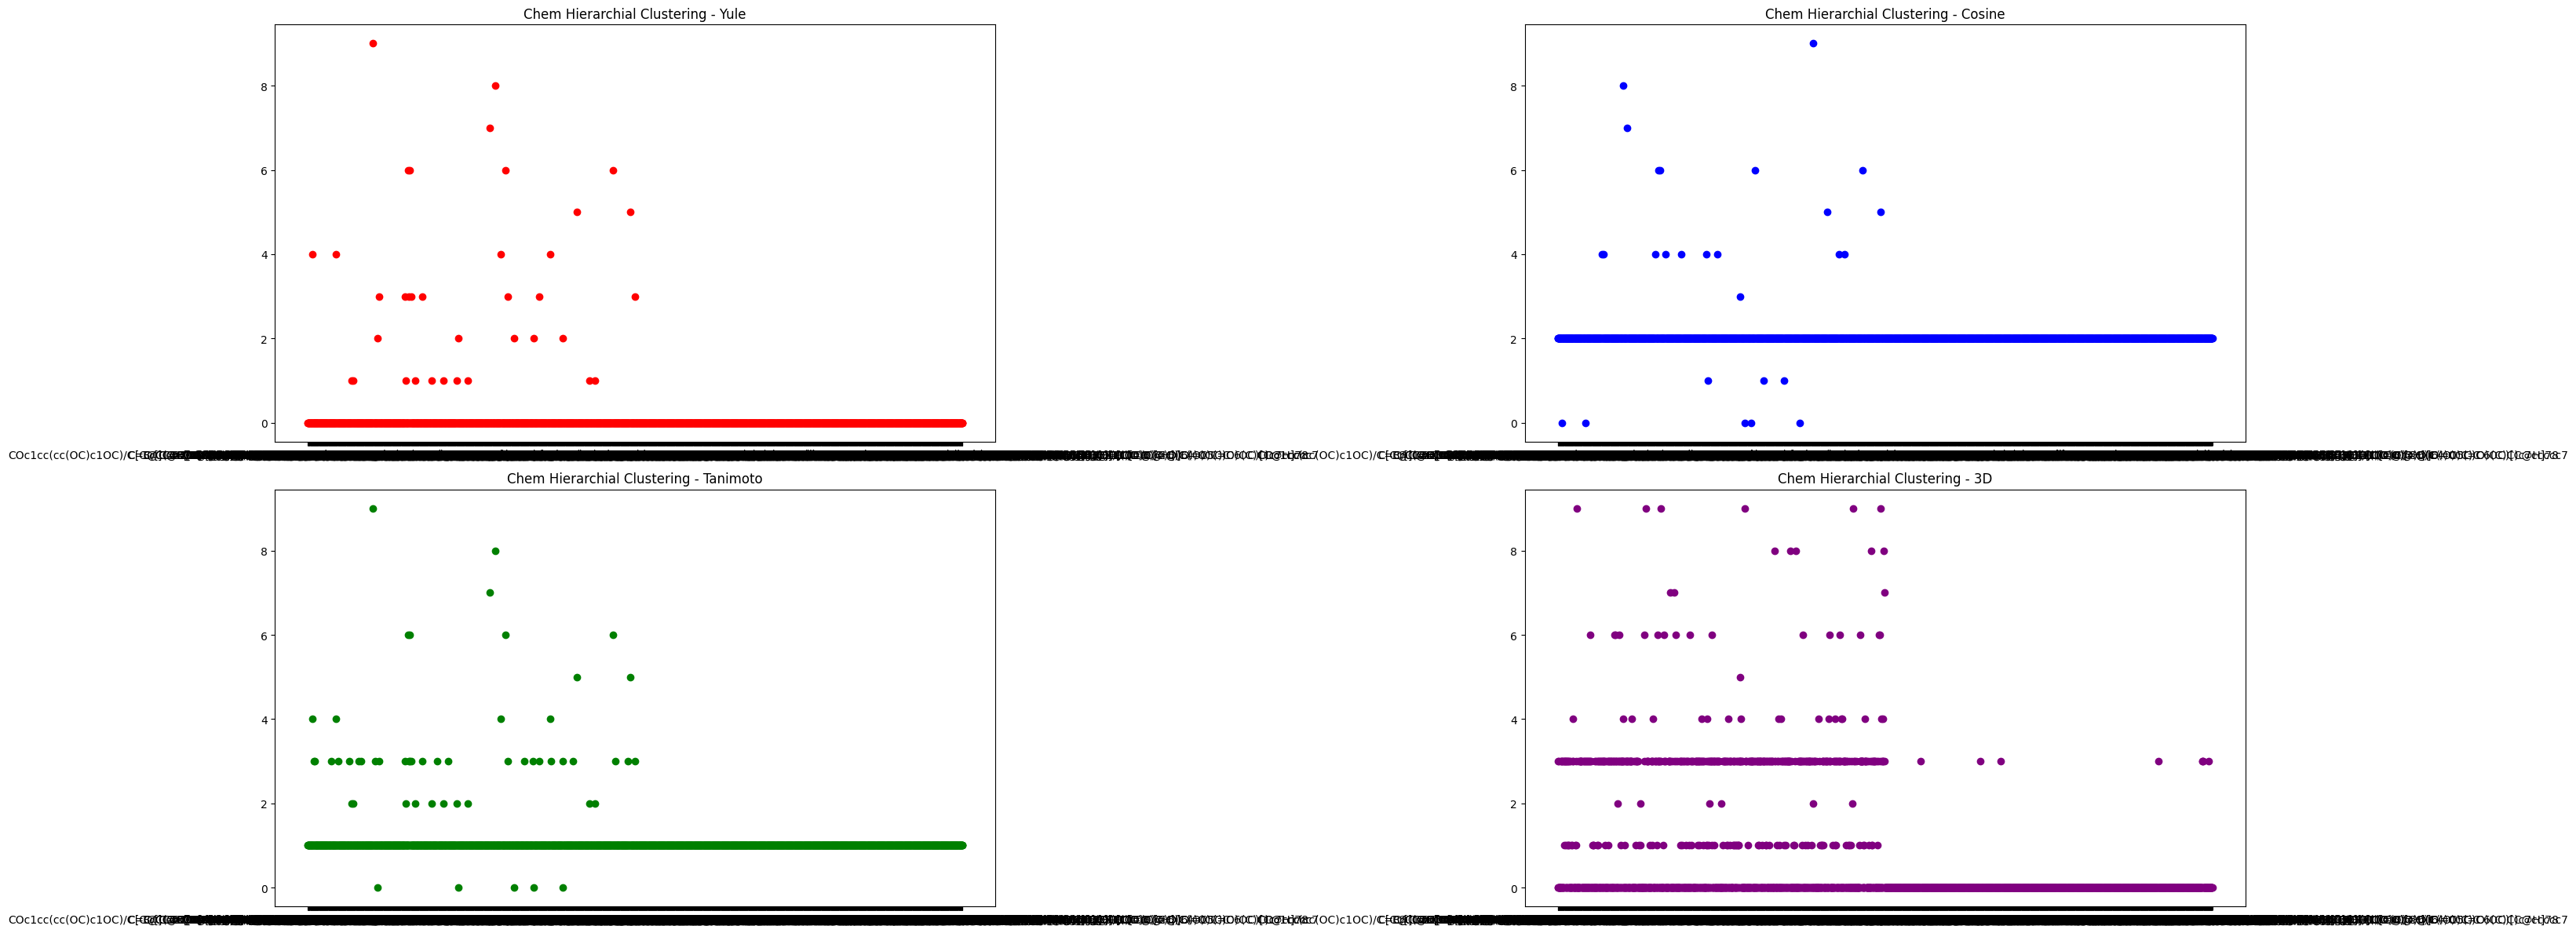

In [4]:
n_clusters = 10
clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average')
cluster_labels1 = clustering.fit_predict(yule_matrix)
cluster_labels2 = clustering.fit_predict(cosine_matrix)
cluster_labels3 = clustering.fit_predict(tanimoto_matrix)
cluster_labels4 = clustering.fit_predict(threed_matrix)
fig, axs = plt.subplots(2, 2, figsize=(32, 12))
axs[0, 0].scatter(X_train['smiles'], cluster_labels1, color='red')
axs[0, 0].set_title('Chem Hierarchial Clustering - Yule')
axs[0, 1].scatter(X_train['smiles'], cluster_labels2, color='blue')
axs[0, 1].set_title('Chem Hierarchial Clustering - Cosine')
axs[1, 0].scatter(X_train['smiles'], cluster_labels3, color='green')
axs[1, 0].set_title('Chem Hierarchial Clustering - Tanimoto')
axs[1, 1].scatter(X_train['smiles'], cluster_labels4, color='purple')
axs[1, 1].set_title('Chem Hierarchial Clustering - 3D')

plt.tight_layout()
plt.show()

/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

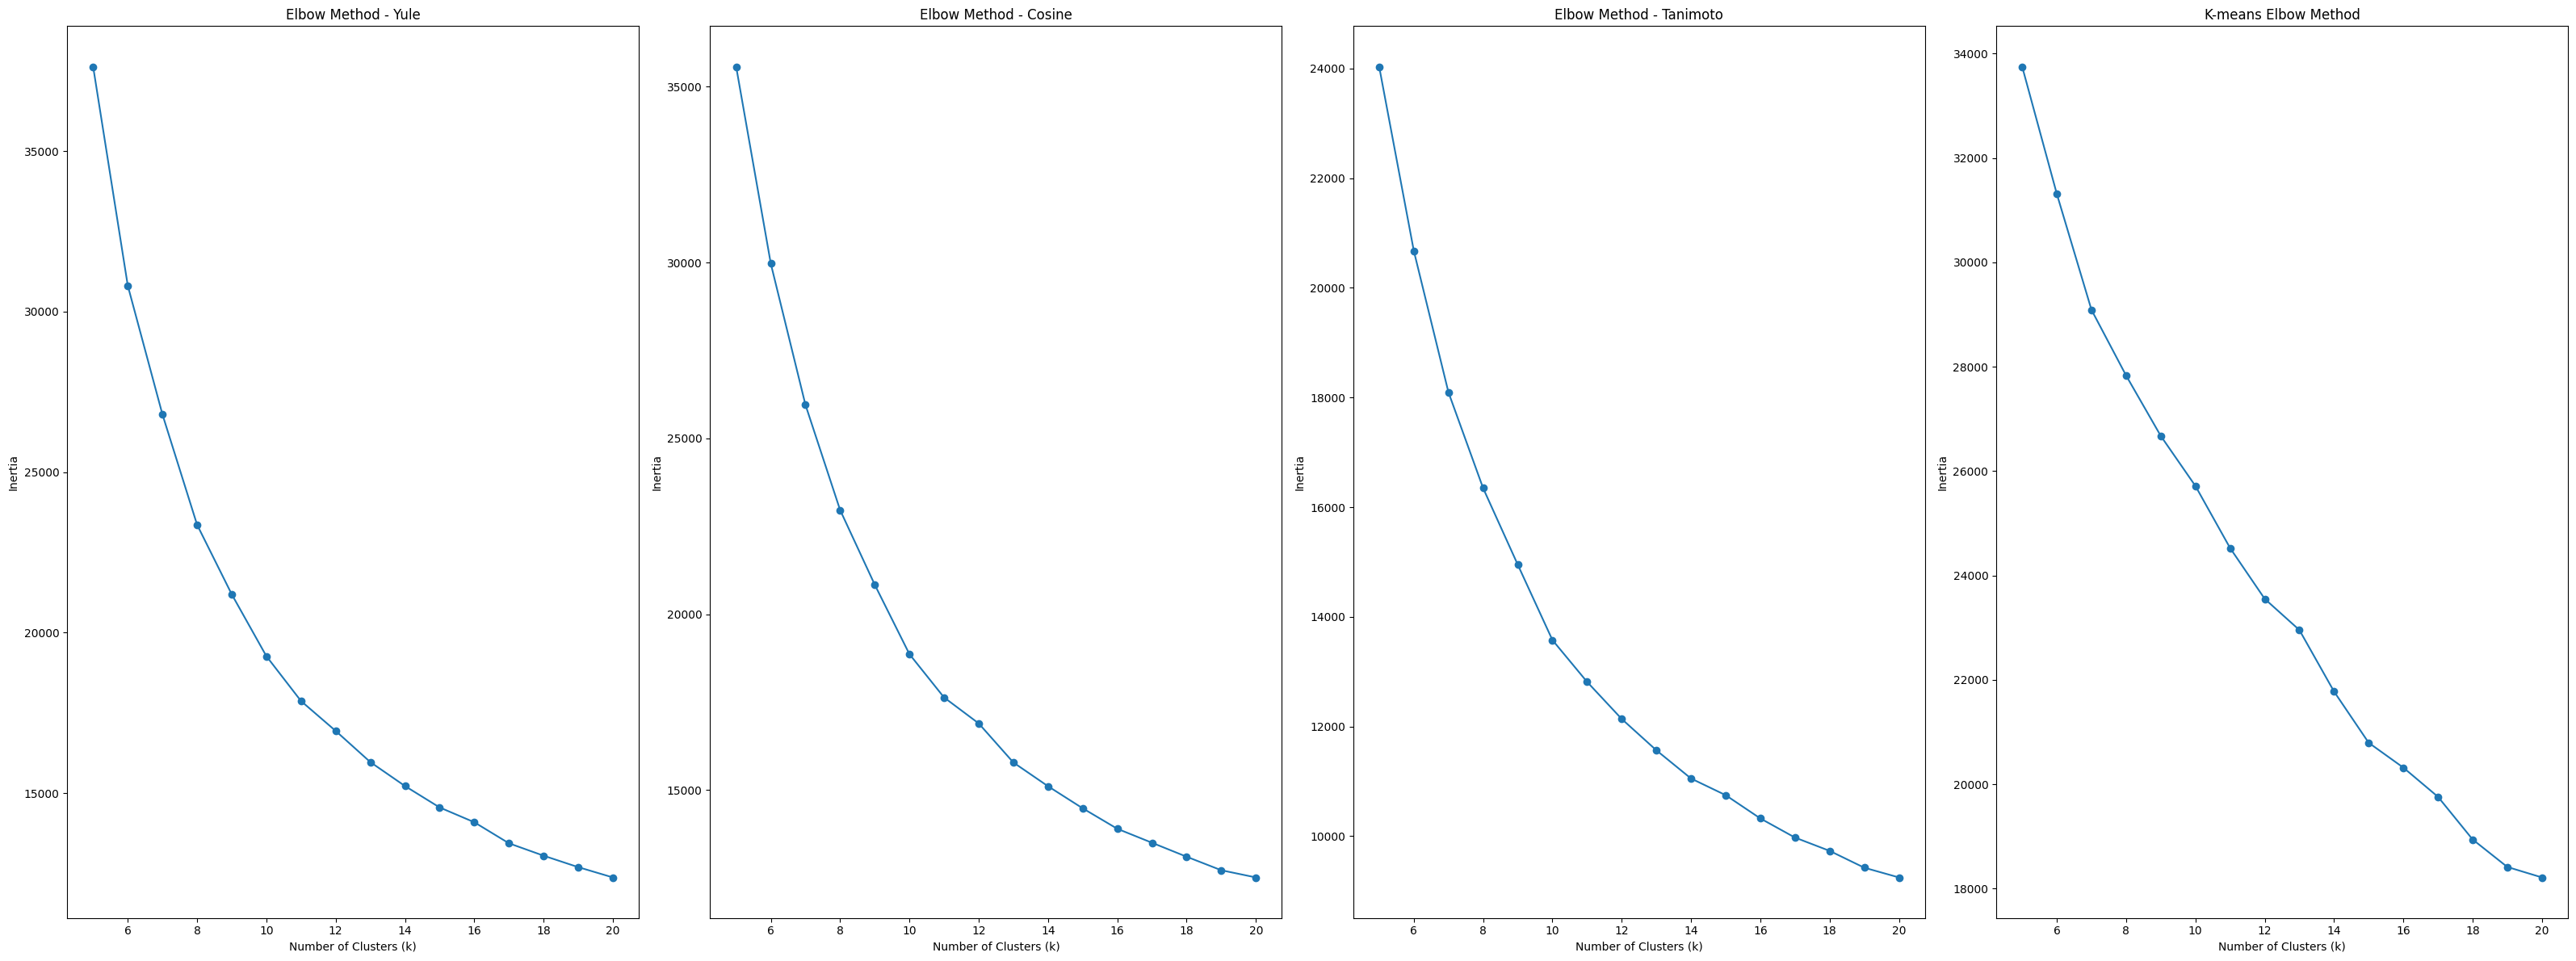

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(32, 12))

inertias1 = kmeans(yule_matrix)
inertias2 = kmeans(cosine_matrix)
inertias3 = kmeans(tanimoto_matrix)
inertias4 = kmeans(threed_matrix)

axes[0].plot(range(5, len(inertias1)+5), inertias1, marker='o')
axes[0].set_title(f'Elbow Method - Yule')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[1].plot(range(5, len(inertias2)+5), inertias2, marker='o')
axes[1].set_title(f'Elbow Method - Cosine')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Inertia')
axes[2].plot(range(5, len(inertias3)+5), inertias3, marker='o')
axes[2].set_title(f'Elbow Method - Tanimoto')
axes[2].set_xlabel('Number of Clusters (k)')
axes[2].set_ylabel('Inertia')
axes[3].plot(range(5, len(inertias4)+5), inertias4, marker='o')
axes[3].set_title(f'Elbow Method - 3D')
axes[3].set_xlabel('Number of Clusters (k)')
axes[3].set_ylabel('Inertia')
plt.title('K-means Elbow Method')
plt.tight_layout()
plt.show()

In [6]:
from scipy.spatial.distance import cdist
k = 20
kmean = KMeans(n_clusters = k, random_state = 42)
kmean.fit(yule_matrix)
clusterlables_kmean_yule = kmean.labels_
print(clusterlables_kmean_yule)
centroid_coordinates_yule = kmean.cluster_centers_
centroid_indices_yule = [np.argmin(cdist(yule_matrix[np.where(clusterlables_kmean_yule == i)], [centroid_coordinates_yule[i]])) for i in range(k)]
print(centroid_indices_yule)
print(centroid_coordinates_yule)

kmean = KMeans(n_clusters = k, random_state = 42)
kmean.fit(cosine_matrix)
clusterlables_kmean_cosine = kmean.labels_
print(clusterlables_kmean_cosine)
centroid_coordinates_cosine = kmean.cluster_centers_
centroid_indices_cosine = [np.argmin(cdist(cosine_matrix[np.where(clusterlables_kmean_cosine == i)], [centroid_coordinates_cosine[i]])) for i in range(k)]
print(centroid_indices_cosine)
print(centroid_coordinates_cosine)

kmean = KMeans(n_clusters = k, random_state = 42)
kmean.fit(tanimoto_matrix)
clusterlables_kmean_tanimoto = kmean.labels_
print(clusterlables_kmean_tanimoto)
centroid_coordinates_tanimoto = kmean.cluster_centers_
centroid_indices_tanimoto = [np.argmin(cdist(tanimoto_matrix[np.where(clusterlables_kmean_tanimoto == i)], [centroid_coordinates_tanimoto[i]])) for i in range(k)]
print(centroid_indices_tanimoto)
print(centroid_coordinates_tanimoto)

kmean = KMeans(n_clusters = k, random_state = 42)
kmean.fit(threed_matrix)
clusterlables_kmean_threed = kmean.labels_
print(clusterlables_kmean_threed)
centroid_coordinates_threed = kmean.cluster_centers_
centroid_indices_threed = [np.argmin(cdist(threed_matrix[np.where(clusterlables_kmean_threed == i)], [centroid_coordinates_threed[i]])) for i in range(k)]
print(centroid_indices_threed)
print(centroid_coordinates_threed)

/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 5 10  2 ...  8 17  1]
[18, 296, 56, 30, 53, 94, 0, 3, 46, 95, 29, 134, 187, 70, 100, 44, 72, 94, 50, 9]
[[ 5.78757168e-01  9.06176172e-01  8.54922798e-01 ...  5.59915112e-01
   9.22544412e-01  4.80809023e-01]
 [ 4.95279848e-01  9.06116375e-01  8.63584007e-01 ... -6.10622664e-16
   6.66133815e-16 -5.55111512e-17]
 [ 8.36207964e-01  8.54008497e-01  8.01726593e-01 ...  7.94128824e-01
   9.00475981e-01  8.22197367e-01]
 ...
 [ 9.29440561e-01  8.42483450e-01  8.52092073e-01 ... -1.66533454e-16
   5.55111512e-17  5.55111512e-17]
 [ 6.76935353e-01  8.93189998e-01  8.19243730e-01 ...  5.89265631e-01
   9.19586957e-01  5.95751876e-01]
 [ 6.47944843e-01  9.17203488e-01  9.01376995e-01 ...  7.67310215e-01
   9.24940361e-01  6.25829629e-01]]


/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[13  4 17 ...  3  5  1]
[133, 279, 3, 87, 0, 94, 7, 50, 162, 0, 84, 26, 30, 96, 31, 49, 53, 47, 88, 7]
[[ 4.91539267e-01  8.40226667e-01  8.01770311e-01 ...  6.26501798e-01
   8.57723805e-01  4.54783764e-01]
 [ 4.64129526e-01  8.57312459e-01  8.22015824e-01 ... -5.55111512e-17
  -3.88578059e-16  1.11022302e-16]
 [ 7.95240933e-01  8.30708562e-01  6.52249717e-01 ...  6.09052096e-01
   8.87299978e-01  7.66281563e-01]
 ...
 [ 8.19429220e-01  8.35987624e-01  7.88930261e-01 ...  7.55656394e-01
   8.83386292e-01  7.87560569e-01]
 [ 6.05843110e-01  8.71745993e-01  8.41270139e-01 ...  6.96663925e-01
   8.89423429e-01  5.81476047e-01]
 [ 9.55332004e-01  9.17220377e-01  9.36136501e-01 ...  9.35625121e-01
   8.90250237e-01  9.44198006e-01]]


/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[15 11  4 ...  2  7  6]
[0, 148, 49, 0, 13, 129, 170, 101, 51, 34, 73, 26, 68, 3, 10, 10, 61, 47, 14, 15]
[[ 8.90911784e-01  9.21076968e-01  7.89644041e-01 ...  0.00000000e+00
   1.11022302e-16  5.55111512e-17]
 [ 7.75068160e-01  9.52330345e-01  9.34086687e-01 ...  8.20393288e-01
   9.61725970e-01  7.34838479e-01]
 [ 8.53592037e-01  9.28699822e-01  8.63946922e-01 ... -1.11022302e-16
   3.33066907e-16  1.11022302e-16]
 ...
 [ 8.08781173e-01  9.43032285e-01  8.99563995e-01 ...  7.40485745e-01
   9.58068875e-01  7.48079573e-01]
 [ 6.19497415e-01  9.51885522e-01  9.28339015e-01 ... -4.99600361e-16
   1.66533454e-16  5.55111512e-17]
 [ 7.37077939e-01  9.50652635e-01  9.20444387e-01 ...  7.10508493e-01
   9.59959705e-01  6.46970119e-01]]


/home/gudurkc2104/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 6 10 16 ... 11 11 19]
[13, 80, 67, 0, 26, 123, 15, 59, 11, 167, 43, 99, 49, 143, 82, 21, 64, 65, 11, 13]
[[ 8.98968268e-01  8.52872939e-01  6.23378531e-01 ... -2.22044605e-16
   3.33066907e-16 -2.22044605e-16]
 [ 7.73716633e-01  9.39287172e-01  9.43004543e-01 ...  9.23051958e-01
   9.17635651e-01  8.24774511e-01]
 [ 9.11028050e-01  8.85132439e-01  7.98698531e-01 ... -2.77555756e-16
   2.77555756e-16 -2.22044605e-16]
 ...
 [ 7.54834403e-01  7.46245082e-01  9.41892401e-01 ...  9.05148220e-01
   8.99707690e-01  7.80006330e-01]
 [ 9.13763741e-01  8.86990020e-01  7.95679326e-01 ...  7.84800555e-01
   8.29332376e-01  8.60450246e-01]
 [ 7.80982881e-01  9.22878034e-01  9.29524860e-01 ... -3.33066907e-16
   2.22044605e-16 -2.77555756e-16]]


In [7]:
print(cluster_labels1)
print(cluster_labels2)
print(cluster_labels3)
print(cluster_labels4)

[0 0 0 ... 0 0 0]
[2 2 2 ... 2 2 2]
[1 1 1 ... 1 1 1]
[0 0 3 ... 0 0 0]


In [8]:
no_test = len(X_test)
print(no_test)
count_yule = np.zeros(k)
count_tanimoto = np.zeros(k)
count_cosine = np.zeros(k)
count_threed = np.zeros(k)
numer_yule = np.zeros((no_test, k))
numer_tanimoto = np.zeros((no_test, k))
numer_cosine = np.zeros((no_test, k))
numer_threed = np.zeros((no_test, k))
numer_tversky = np.zeros((no_test, k))

for i in range(no_test):
    molA = X_test['Molecule'].iloc[i]
    if(molA is None):
        continue
    fpA = X_test['FingerPrint'].iloc[i]
    fpA_3d = X_test['FingerPrint_3d'].iloc[i]
    for j in range(no_mol):
        molB = X_train['Molecule'].iloc[j]
        if(molB is None):
            continue
        fpB = X_train['FingerPrint'].iloc[j]
        fpB_3d = X_train['FingerPrint_3d'].iloc[j]
        m, n = CalculateYuleAndCosine(fpA, fpB)
        numer_yule[i][clusterlables_kmean_yule[j]] += (1-m)*100000
        numer_cosine[i][clusterlables_kmean_cosine[j]] += (1-n)*100000
        numer_tanimoto[i][clusterlables_kmean_tanimoto[j]] += (1-DataStructs.TanimotoSimilarity(fpA, fpB))*100000
        numer_threed[i][clusterlables_kmean_threed[j]] += (1-CalculateThreeDimTanimoto(fpA_3d, fpB_3d))*100000
        numer_tversky[i][clusterlables_kmean_tanimoto[j]] += (1-CalculateTversky(fpA_3d, fpB_3d))*100000
        if(i == 0):
            count_yule[clusterlables_kmean_yule[j]] += 1
            count_tanimoto[clusterlables_kmean_tanimoto[j]] += 1
            count_cosine[clusterlables_kmean_cosine[j]] += 1
            count_threed[clusterlables_kmean_threed[j]] += 1

avg_yule = numer_yule / count_yule
avg_tanimoto = numer_tanimoto / count_tanimoto #np.divide()
avg_cosine = numer_cosine / count_cosine
avg_threed = numer_threed / count_threed
avg_tversky = numer_tversky / count_tanimoto

print(len(avg_yule))
print(avg_yule)
print(avg_tanimoto)
print(avg_cosine)
print(avg_threed)
print(avg_tversky[0][3])

ktest_yulelabel = np.argmin(avg_yule, axis = 1)
ktest_tanimotolabel = np.argmin(avg_tanimoto, axis = 1)
ktest_cosinelabel = np.argmin(avg_cosine, axis = 1)
ktest_threedlabel = np.argmin(avg_threed, axis = 1)
ktest_tverskylabel = np.argmin(avg_tversky, axis = 1)

print(len(ktest_yulelabel))
print(ktest_yulelabel)
print(ktest_tanimotolabel)
print(ktest_cosinelabel)
print(ktest_threedlabel)
print(ktest_tverskylabel)

609
609
[[28802.6391967  50207.09319299 80596.66161891 ... 92120.9510599
  44251.47349936 67676.74692555]
 [52997.18732427 56547.73536135 83017.64851279 ... 92938.12713048
  62166.89903069 69426.61109025]
 [48618.76076724 47127.65087413 81075.05918673 ... 91489.18867732
  59895.75438189 65220.39170209]
 ...
 [72226.89743628 77702.46768269 79249.18210119 ... 88081.17756503
  65777.78996658 83852.85980181]
 [23802.64334877 50639.64422582 79952.58453973 ... 92108.71988113
  40161.12986183 68974.08781979]
 [71386.86837481 77236.62678346 80485.40582998 ... 88514.55857469
  62598.68673336 83335.87712961]]
[[86088.77146959 70062.72769113 76537.59164421 ... 61346.84150789
  71049.97371038 41876.70529825]
 [87644.3873018  76830.08800166 83688.3978664  ... 76828.83354935
  71525.90852819 68960.99791161]
 [86545.54110688 71705.1247458  81850.03343686 ... 75095.43705362
  62518.12072591 65427.48150043]
 ...
 [50418.2488323  88793.92916826 66824.06631108 ... 78858.06376894
  88000.56072794 83401.92

/tmp/ipykernel_26286/267883753.py:37: RuntimeWarning: invalid value encountered in divide
  avg_yule = numer_yule / count_yule
/tmp/ipykernel_26286/267883753.py:38: RuntimeWarning: invalid value encountered in divide
  avg_tanimoto = numer_tanimoto / count_tanimoto #np.divide()
/tmp/ipykernel_26286/267883753.py:39: RuntimeWarning: invalid value encountered in divide
  avg_cosine = numer_cosine / count_cosine
/tmp/ipykernel_26286/267883753.py:40: RuntimeWarning: invalid value encountered in divide
  avg_threed = numer_threed / count_threed
/tmp/ipykernel_26286/267883753.py:41: RuntimeWarning: invalid value encountered in divide
  avg_tversky = numer_tversky / count_tanimoto


In [9]:
simtest_yule = np.zeros((no_test, k))
simtest_cosine = np.zeros((no_test, k))
simtest_tanimoto = np.zeros((no_test, k))
simtest_tversky = np.zeros((no_test, k))
simtest_threed = np.zeros((no_test, k))
no_test = len(X_test)
print(no_test)
for i in range(no_test):
    
    molA = X_test['Molecule'].iloc[i]
    if(molA is None):
        continue
    fpA = X_test['FingerPrint'].iloc[i]
    fpA_3d = X_test['FingerPrint_3d'].iloc[i]
    
    for j in range(k):
        
        molB = X_train['Molecule'].iloc[centroid_indices_yule[j]]
        if(molB is not None):
            fpB = X_train['FingerPrint'].iloc[centroid_indices_yule[j]]
            fpB_3d = X_train['FingerPrint_3d'].iloc[centroid_indices_yule[j]]
            m, n = CalculateYuleAndCosine(fpA, fpB)
            simtest_yule[i][j] = 1-m
        
        molB = X_train['Molecule'].iloc[centroid_indices_cosine[j]]
        if(molB is not None):
            fpB = X_train['FingerPrint'].iloc[centroid_indices_cosine[j]]
            fpB_3d = X_train['FingerPrint_3d'].iloc[centroid_indices_cosine[j]]
            m, n = CalculateYuleAndCosine(fpA, fpB)
            simtest_cosine[i][j] = 1-n
        
        molB = X_train['Molecule'].iloc[centroid_indices_tanimoto[j]]
        if(molB is not None):
            fpB = X_train['FingerPrint'].iloc[centroid_indices_tanimoto[j]]
            fpB_3d = X_train['FingerPrint_3d'].iloc[centroid_indices_tanimoto[j]]
            simtest_tanimoto[i][j] = 1-DataStructs.TanimotoSimilarity(fpA, fpB)
            simtest_tversky[i][j] = 1-CalculateTversky(fpA_3d, fpB_3d)
        
        molB = X_train['Molecule'].iloc[centroid_indices_threed[j]]
        if(molB is not None):
            fpB = X_train['FingerPrint'].iloc[centroid_indices_threed[j]]
            fpB_3d = X_train['FingerPrint_3d'].iloc[centroid_indices_threed[j]]
            simtest_threed[i][j] = 1-CalculateThreeDimTanimoto(fpA_3d, fpB_3d)

print(simtest_yule, '\n')
print(simtest_tanimoto, '\n')
print(simtest_cosine, '\n')
print(simtest_threed, '\n')
print(simtest_tversky, '\n')

kmean_yulelabel = np.argmin(simtest_yule, axis = 1)
kmean_tanimotolabel = np.argmin(simtest_tanimoto, axis = 1)
kmean_cosinelabel = np.argmin(simtest_cosine, axis = 1)
kmean_threedlabel = np.argmin(simtest_threed, axis = 1)
kmean_tverskylabel = np.argmin(simtest_tversky, axis = 1)

print(kmean_yulelabel, '\n')
print(kmean_tanimotolabel, '\n')
print(kmean_cosinelabel, '\n')
print(kmean_threedlabel, '\n')
print(kmean_tverskylabel, '\n')

609
[[0.38338658 0.48792711 0.32599119 ... 0.39545252 0.37586347 0.668678  ]
 [0.59538905 0.6171108  0.54373402 ... 0.57937585 0.54846336 0.56166983]
 [0.58229285 0.56779078 0.51967709 ... 0.5296469  0.50668994 0.57446809]
 ...
 [0.65024982 0.76923077 0.72979642 ... 0.76315789 0.76141384 0.84444444]
 [0.33819774 0.47368421 0.28132388 ... 0.44919355 0.36323202 0.6815534 ]
 [0.61048159 0.76065277 0.73039216 ... 0.75325804 0.75894814 0.8248974 ]] 

[[0.72769029 0.39020537 0.78358703 ... 0.81404421 0.57238443 0.37845011]
 [0.70288248 0.70073822 0.77828571 ... 0.86314655 0.685      0.65053129]
 [0.65202703 0.67487121 0.71361502 ... 0.83780881 0.71907422 0.63861095]
 ...
 [0.88829787 0.83828775 0.89805097 ... 0.85917722 0.87318841 0.84291642]
 [0.74292317 0.31681145 0.78441711 ... 0.80104712 0.58488499 0.31525077]
 [0.88845144 0.82616487 0.89807976 ... 0.8490566  0.87443946 0.84257075]] 

[[0.43535158 0.52230011 0.55005649 ... 0.61967547 0.49069515 0.4422009 ]
 [0.60579664 0.6448859  0.69080

In [10]:
centroid_coords1 = [np.mean(yule_matrix[np.where(cluster_labels1 == j)]) for j in range(n_clusters)]
print(centroid_coords1)
print(len(centroid_coords1))
centroid_coords2 = [np.mean(cosine_matrix[np.where(cluster_labels2 == j)]) for j in range(n_clusters)]
print(centroid_coords2)
centroid_coords3 = [np.mean(tanimoto_matrix[np.where(cluster_labels3 == j)]) for j in range(n_clusters)]
print(centroid_coords3)
centroid_coords4 = [np.mean(threed_matrix[np.where(cluster_labels4 == j)]) for j in range(n_clusters)]
print(centroid_coords4)

centroid_indices1 = []
for i in range(n_clusters):
    ind = np.where(cluster_labels1 == i)
    if(len(ind[0])==0):
        centroid_indices1.append(None)
        continue
    men = np.mean(yule_matrix[ind], axis = 1)
    leng = len(ind)
    coord = [centroid_coords1[i] for _ in range(leng)]
    index = np.argmin(abs(coord - men))
    centroid_indices1.append(ind[0][index])
print(centroid_indices1)

centroid_indices2 = []
for i in range(n_clusters):
    ind = np.where(cluster_labels2 == i)
    if(len(ind[0])==0):
        centroid_indices2.append(None)
        continue
    men = np.mean(cosine_matrix[ind], axis = 1)
    leng = len(ind)
    coord = [centroid_coords2[i] for _ in range(leng)]
    index = np.argmin(abs(coord - men))
    centroid_indices2.append(ind[0][index])
print(centroid_indices2)

centroid_indices3 = []
for i in range(n_clusters):
    ind = np.where(cluster_labels3 == i)
    if(len(ind[0])==0):
        centroid_indices3.append(None)
        continue
    men = np.mean(tanimoto_matrix[ind], axis = 1)
    leng = len(ind)
    coord = [centroid_coords3[i] for _ in range(leng)]
    index = np.argmin(abs(coord - men))
    centroid_indices3.append(ind[0][index])
print(centroid_indices3)

centroid_indices4 = []
for i in range(n_clusters):
    ind = np.where(cluster_labels4 == i)
    if(len(ind[0])==0):
        centroid_indices4.append(None)
        continue
    men = np.mean(threed_matrix[ind], axis = 1)
    leng = len(ind)
    coord = [centroid_coords4[i] for _ in range(leng)]
    index = np.argmin(abs(coord - men))
    centroid_indices4.append(ind[0][index])
print(centroid_indices4)

[0.4979634763438694, 0.9612258684535541, 0.8964819502941216, 0.8924120764911435, 0.9760818588465278, 0.9848515831448228, 0.9435680485325281, 0.9917961876220626, 0.9219737035579358, 0.9274391837865256]
10
[0.9304459870281188, 0.8594271796096117, 0.4828273547314235, 0.9754093180811827, 0.9157337176883873, 0.9605153624530803, 0.9013281397739163, 0.8567114509912089, 0.8849294957086935, 0.852994104368601]
[0.9424107341050181, 0.5836319901008784, 0.9768903258511485, 0.9302253287530468, 0.9846116853840148, 0.989268673265732, 0.9674757295993439, 0.9928118823692644, 0.9564698771171146, 0.9593694349416173]
[0.5631821423452208, 0.8471521822805673, 0.8934653417772974, 0.837149156381126, 0.8695044022811818, 0.9751086844651439, 0.8626401209422618, 0.9091456360836991, 0.8868426681245987, 0.8855280769712526]
[1741, 363, 765, 265, 104, 1000, 734, 676, 696, 242]
[899, 765, 471, 676, 594, 1198, 734, 259, 242, 948]
[765, 1741, 363, 743, 104, 1000, 734, 676, 696, 242]
[2029, 132, 608, 77, 968, 676, 492, 43

In [11]:
simtest_yule2 = np.zeros((no_test, n_clusters))
simtest_cosine2 = np.zeros((no_test, n_clusters))
simtest_tanimoto2 = np.zeros((no_test, n_clusters))
simtest_tversky2 = np.zeros((no_test, n_clusters))
simtest_threed2 = np.zeros((no_test, n_clusters))
no_test = len(X_test)
print(no_test)
for i in range(no_test):
    
    molA = X_test['Molecule'].iloc[i]
    if(molA is None):
        continue
    fpA = X_test['FingerPrint'].iloc[i]
    fpA_3d = X_test['FingerPrint_3d'].iloc[i]
    
    for j in range(n_clusters):
        
        molB = X_train['Molecule'].iloc[centroid_indices1[j]]
        if(molB is not None):
            fpB = X_train['FingerPrint'].iloc[centroid_indices1[j]]
            fpB_3d = X_train['FingerPrint_3d'].iloc[centroid_indices1[j]]
            m, n = CalculateYuleAndCosine(fpA, fpB)
            simtest_yule2[i][j] = 1-m
        
        molB = X_train['Molecule'].iloc[centroid_indices2[j]]
        if(molB is not None):
            fpB = X_train['FingerPrint'].iloc[centroid_indices2[j]]
            fpB_3d = X_train['FingerPrint_3d'].iloc[centroid_indices2[j]]
            m, n = CalculateYuleAndCosine(fpA, fpB)
            simtest_cosine2[i][j] = 1-n
        
        molB = X_train['Molecule'].iloc[centroid_indices3[j]]
        if(molB is not None):
            fpB = X_train['FingerPrint'].iloc[centroid_indices3[j]]
            fpB_3d = X_train['FingerPrint_3d'].iloc[centroid_indices3[j]]
            simtest_tanimoto2[i][j] = 1-DataStructs.TanimotoSimilarity(fpA, fpB)
            simtest_tversky2[i][j] = 1-CalculateTversky(fpA_3d, fpB_3d)
        
        molB = X_train['Molecule'].iloc[centroid_indices4[j]]
        if(molB is not None):
            fpB = X_train['FingerPrint'].iloc[centroid_indices4[j]]
            fpB_3d = X_train['FingerPrint_3d'].iloc[centroid_indices4[j]]
            simtest_threed2[i][j] = 1-CalculateThreeDimTanimoto(fpA_3d, fpB_3d)

print(simtest_yule2, '\n')
print(simtest_tanimoto2, '\n')
print(simtest_cosine2, '\n')
print(simtest_threed2, '\n')
print(simtest_tversky2, '\n')

agglo_yulelabel = np.argmin(simtest_yule2, axis = 1)
agglo_tanimotolabel = np.argmin(simtest_tanimoto2, axis = 1)
agglo_cosinelabel = np.argmin(simtest_cosine2, axis = 1)
agglo_threedlabel = np.argmin(simtest_threed2, axis = 1)
agglo_tverskylabel = np.argmin(simtest_tversky2, axis = 1)

print(agglo_yulelabel, '\n')
print(agglo_tanimotolabel, '\n')
print(agglo_cosinelabel, '\n')
print(agglo_threedlabel, '\n')
print(agglo_tverskylabel, '\n')
print(len(agglo_yulelabel))

609
[[0.99581006 0.98474341 0.90488599 ... 0.9986014  0.93071286 0.93578595]
 [0.99396682 0.97622585 0.91122715 ... 0.99394856 0.93989071 0.93112948]
 [0.9942029  0.97428571 0.89407314 ... 0.99709302 0.91831357 0.93359894]
 ...
 [1.         0.94690265 0.86574074 ... 1.         0.91959799 0.93367347]
 [0.99520671 0.98570578 0.89954853 ... 0.99760048 0.93325662 0.94110855]
 [1.         0.94857143 0.89616253 ... 0.99408284 0.92665037 0.94540943]] 

[[0.9500684  0.99790063 0.99231307 ... 0.99930021 0.96411318 0.96682792]
 [0.95355191 0.99697428 0.98796992 ... 0.9969651  0.96901408 0.96433666]
 [0.94407457 0.99709302 0.9869754  ... 0.9985444  0.95741758 0.96565934]
 ...
 [0.9280397  1.         0.97272727 ... 1.         0.95811518 0.96569921]
 [0.94711824 0.9975976  0.99280144 ... 0.9987988  0.96547619 0.96966092]
 [0.9452381  1.         0.97360704 ... 0.99703264 0.96192893 0.97193878]] 

[[0.91338013 0.81324731 0.20411175 ... 0.78047479 0.84481858 0.77004187]
 [0.95749719 0.8719604  0.43785

In [12]:
def kmean_avgsimdf(m):
    
    ind1 = np.where(clusterlables_kmean_yule == m)[0]
    ind2 = np.where(clusterlables_kmean_cosine == m)[0]
    ind3 = np.where(clusterlables_kmean_tanimoto == m)[0]
    ind4 = np.where(clusterlables_kmean_threed == m)[0]
    df = []
    df.append(np.mean(yule_matrix[ind1], axis = 1))
    df.append(np.mean(cosine_matrix[ind2], axis = 1))
    df.append(np.mean(tanimoto_matrix[ind3], axis = 1))
    df.append(np.mean(threed_matrix[ind4], axis = 1))
    
    return df

def agglo_avgsimdf(m):
    
    ind1 = np.where(cluster_labels1 == m)[0]
    ind2 = np.where(cluster_labels2 == m)[0]
    ind3 = np.where(cluster_labels3 == m)[0]
    ind4 = np.where(cluster_labels4 == m)[0]
    df = []
    df.append(np.mean(yule_matrix[ind1], axis = 1))
    df.append(np.mean(cosine_matrix[ind2], axis = 1))
    df.append(np.mean(tanimoto_matrix[ind3], axis = 1))
    df.append(np.mean(threed_matrix[ind4], axis = 1))
    
    return df

0.18646209633031396
0.20899177737882793
0.20086461036900516
0.21072244165328494
0.2651570849718102


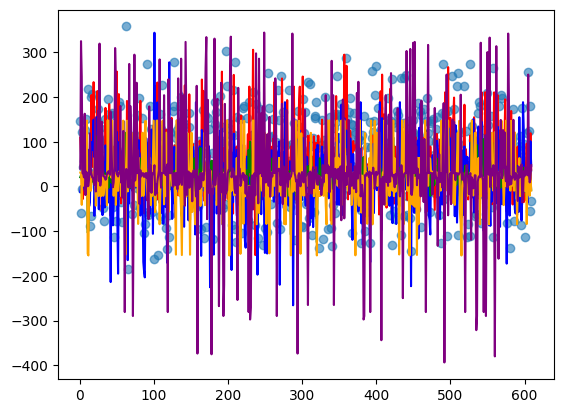

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

no_test = len(X_test)
mpc_pred_kmean_yule = []
mpc_pred_kmean_cosine = []
mpc_pred_kmean_tanimoto = []
mpc_pred_kmean_tversky = []
mpc_pred_kmean_threed = []

model = LinearRegression()

for i in range(no_test):
    
    cluster_yule = kmean_yulelabel[i]
    ind = np.where(clusterlables_kmean_yule == cluster_yule)[0]
    x_yule = np.mean(yule_matrix[ind], axis = 1).reshape(-1, 1)
    y_yule = (Y_train.iloc[ind].values).reshape(-1, 1)
    model.fit(x_yule, y_yule)
    mpc_pred_kmean_yule.append(model.predict([[simtest_yule[i][cluster_yule]]])/2)
    
    cluster_cosine = kmean_cosinelabel[i]
    ind = np.where(clusterlables_kmean_cosine == cluster_cosine)[0]
    x_cosine = np.mean(cosine_matrix[ind], axis = 1).reshape(-1, 1)
    y_cosine = (Y_train.iloc[ind].values).reshape(-1, 1)
    model.fit(x_cosine, y_cosine)
    mpc_pred_kmean_cosine.append(model.predict([[simtest_cosine[i][cluster_cosine]]])/2)
    
    cluster_tanimoto = kmean_tanimotolabel[i]
    ind = np.where(clusterlables_kmean_tanimoto == cluster_tanimoto)[0]
    x_tanimoto = np.mean(tanimoto_matrix[ind], axis = 1).reshape(-1, 1)
    y_tanimoto = (Y_train.iloc[ind].values).reshape(-1, 1)
    model.fit(x_tanimoto, y_tanimoto)
    mpc_pred_kmean_tanimoto.append(model.predict([[simtest_tanimoto[i][cluster_tanimoto]]])/6)
    mpc_pred_kmean_tversky.append(model.predict([[simtest_tversky[i][cluster_tanimoto]]])/6)
    
    cluster_threed = kmean_threedlabel[i]
    ind = np.where(clusterlables_kmean_threed == cluster_threed)[0]
    x_threed = np.mean(threed_matrix[ind], axis = 1).reshape(-1, 1)
    y_threed = (Y_train.iloc[ind].values).reshape(-1, 1)
    model.fit(x_threed, y_threed)
    mpc_pred_kmean_threed.append(model.predict([[simtest_threed[i][cluster_tanimoto]]])/6)

mpc_pred_kmean_yule1D = (np.concatenate(mpc_pred_kmean_yule, axis=0)).flatten()
mpc_pred_kmean_cosine1D = (np.concatenate(mpc_pred_kmean_cosine, axis=0)).flatten()
mpc_pred_kmean_tanimoto1D = (np.concatenate(mpc_pred_kmean_tanimoto, axis=0)).flatten()
mpc_pred_kmean_tversky1D = (np.concatenate(mpc_pred_kmean_tversky, axis=0)).flatten()
mpc_pred_kmean_threed1D = (np.concatenate(mpc_pred_kmean_threed, axis=0)).flatten()
    
#print(mpc_pred_kmean_yule1D)
#print(mpc_pred_kmean_cosine1D)
#print(mpc_pred_kmean_tanimoto1D)
#print(mpc_pred_kmean_tversky1D)
#print(mpc_pred_kmean_threed1D)

data_range = np.max(Y_test.values) - np.min(Y_test.values)

kmean_rmse_yule = (mean_squared_error(mpc_pred_kmean_yule1D, Y_test)**0.5) /data_range
kmean_rmse_cosine = (mean_squared_error(mpc_pred_kmean_cosine1D, Y_test)**0.5) /data_range
kmean_rmse_tanimoto = (mean_squared_error(mpc_pred_kmean_tanimoto1D, Y_test)**0.5) /data_range
kmean_rmse_tversky = (mean_squared_error(mpc_pred_kmean_tversky1D, Y_test)**0.5) /data_range
kmean_rmse_threed = (mean_squared_error(mpc_pred_kmean_threed1D, Y_test)**0.5)/ data_range

print(kmean_rmse_yule)
print(kmean_rmse_cosine)
print(kmean_rmse_tanimoto)
print(kmean_rmse_tversky)
print(kmean_rmse_threed)

dum_x = [i+1 for i in range(len(X_test))]
plt.scatter(dum_x, Y_test.values, alpha=0.6, label='Actual Data')
plt.plot(dum_x, mpc_pred_kmean_yule1D, color='red')
plt.plot(dum_x, mpc_pred_kmean_cosine1D, color='blue')
plt.plot(dum_x, mpc_pred_kmean_tanimoto1D, color='green')
plt.plot(dum_x, mpc_pred_kmean_tversky1D, color='orange')
plt.plot(dum_x, mpc_pred_kmean_threed1D, color='purple')
plt.show()

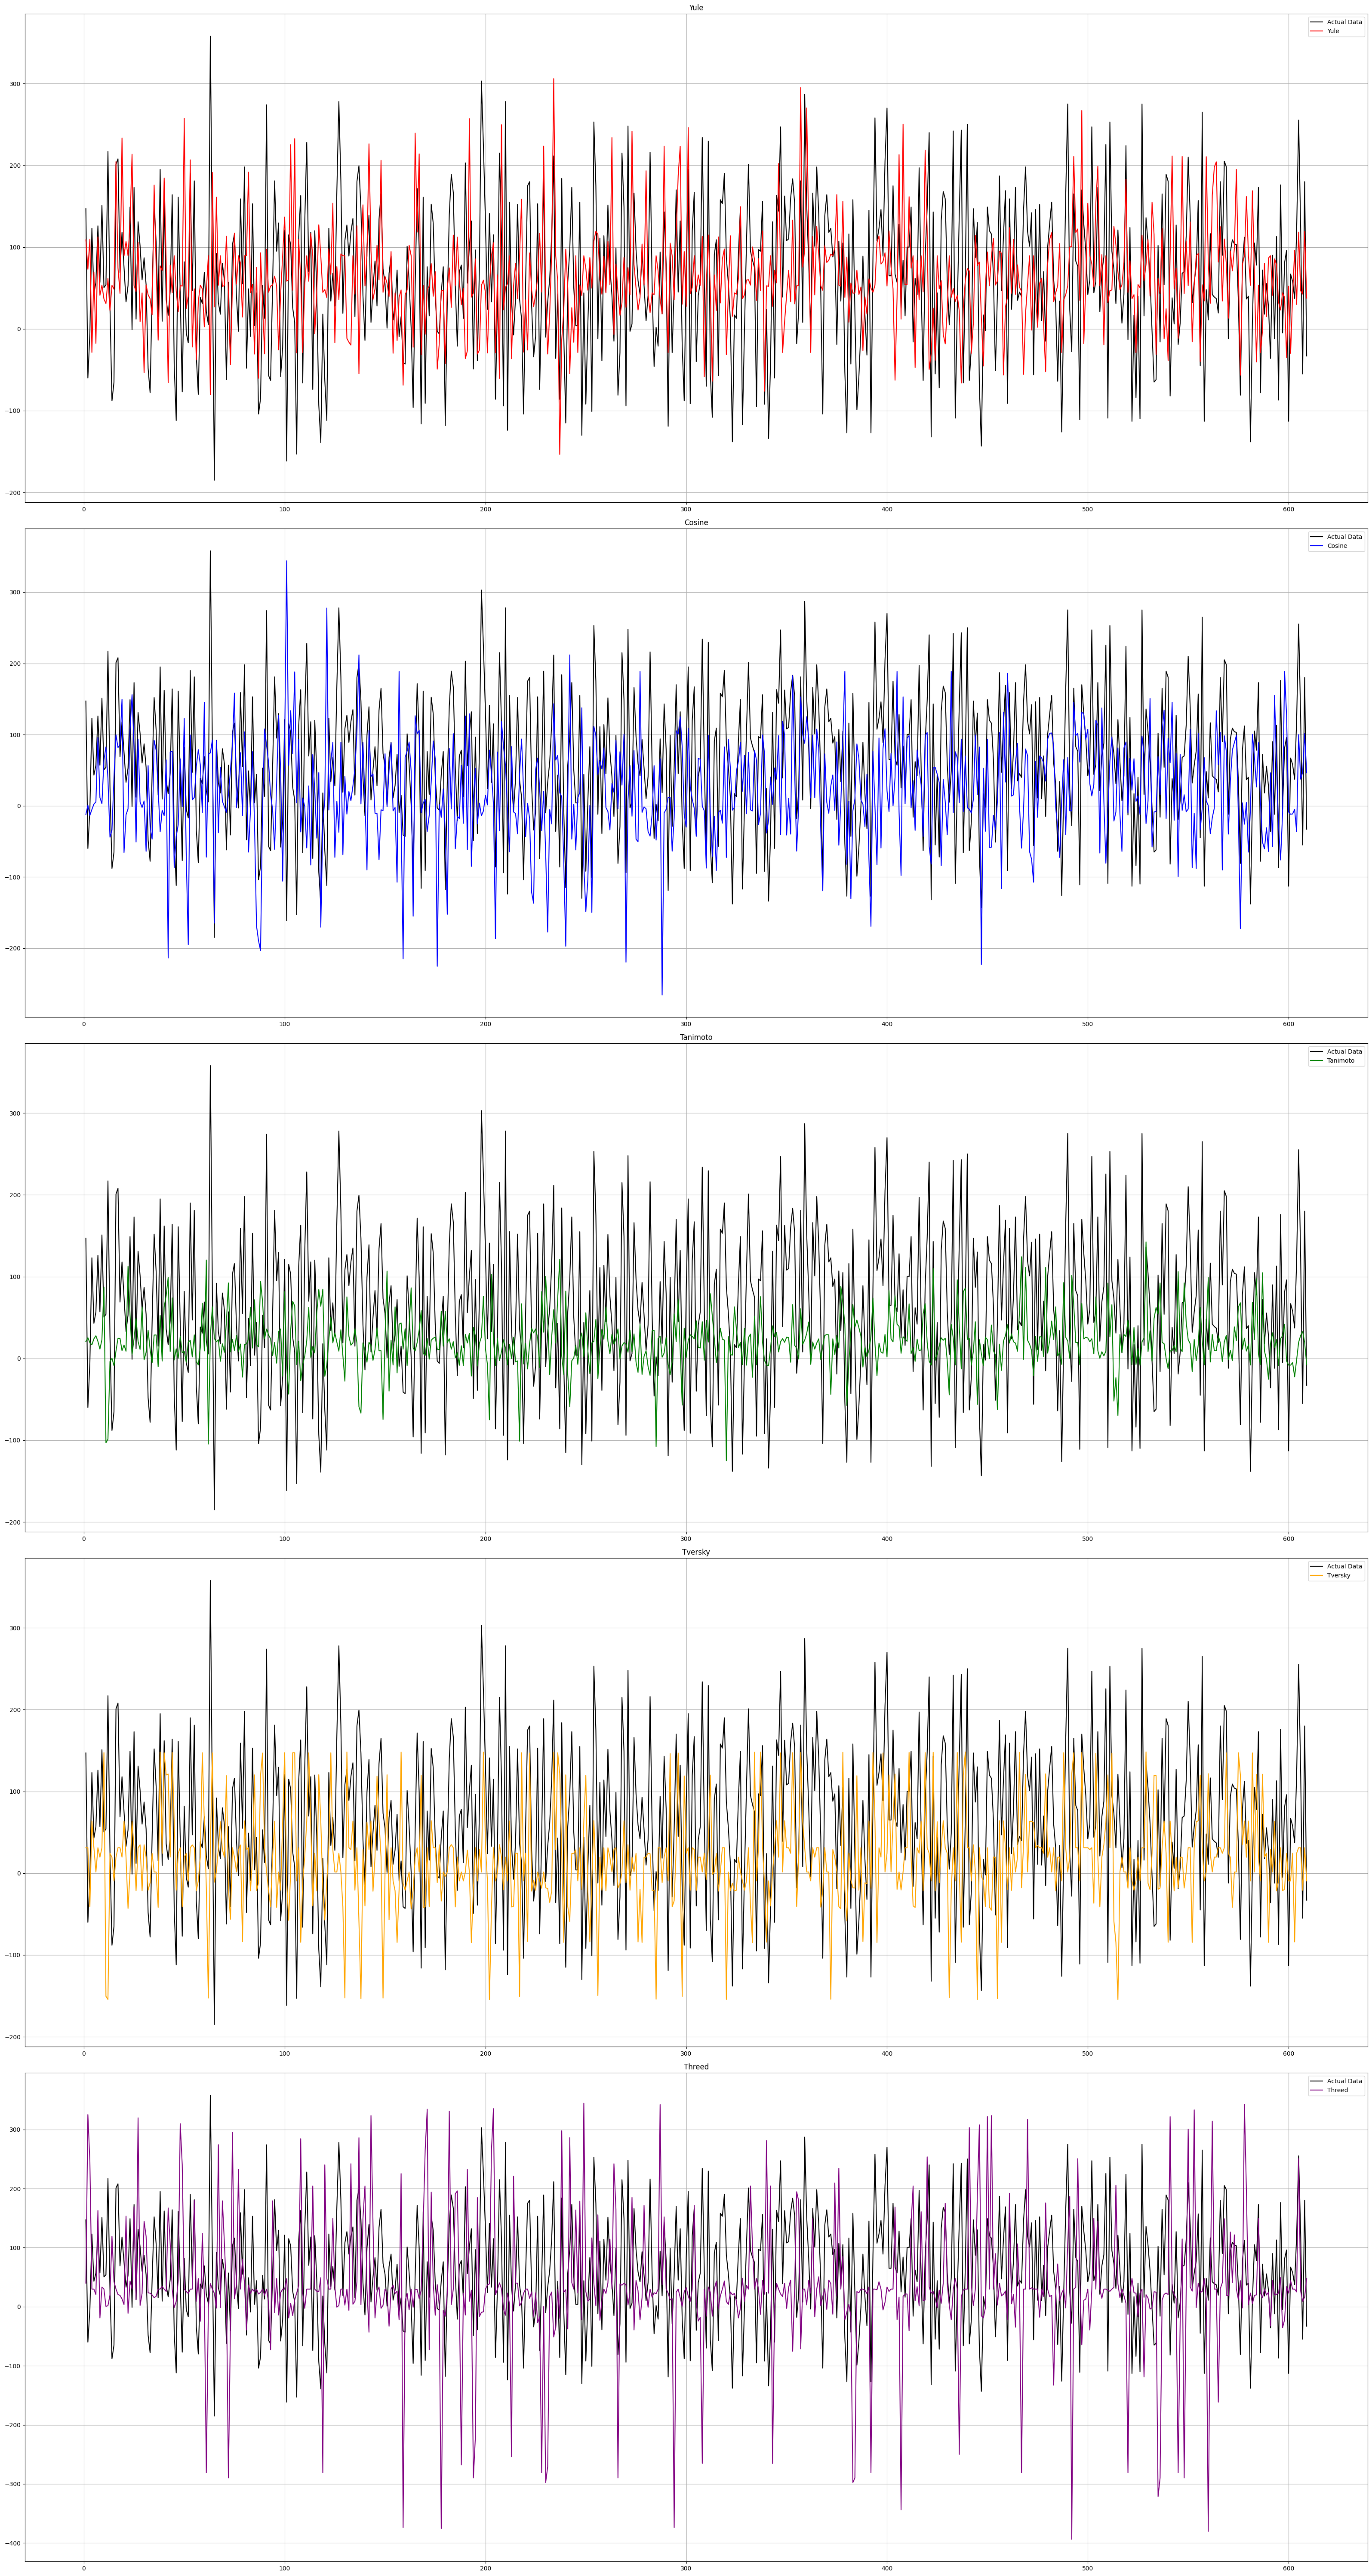

In [18]:
plt.figure(figsize=(32, 60))

# Plot each line in a separate subplot
plt.subplot(511)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_kmean_yule1D, color='red', label='Yule')
plt.legend()
plt.grid(True) 
plt.title('Yule')

plt.subplot(512)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_kmean_cosine1D, color='blue', label='Cosine')
plt.legend()
plt.grid(True)
plt.title('Cosine')

plt.subplot(513)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_kmean_tanimoto1D, color='green', label='Tanimoto')
plt.legend()
plt.grid(True)
plt.title('Tanimoto')

plt.subplot(514)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_kmean_tversky1D, color='orange', label='Tversky')
plt.legend()
plt.grid(True)
plt.title('Tversky')

plt.subplot(515)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_kmean_threed1D, color='purple', label='Threed')
plt.legend()
plt.grid(True)
plt.title('Threed')

plt.tight_layout()

plt.show()

0.28226432004111884
0.2806375375089301
1.0101861888416486
1.1068924127235333
0.3866809051775003


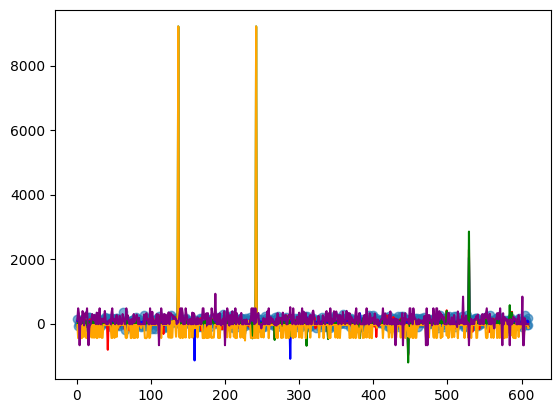

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

no_test = len(X_test)
mpc_pred_agglo_yule = []
mpc_pred_agglo_cosine = []
mpc_pred_agglo_tanimoto = []
mpc_pred_agglo_tversky = []
mpc_pred_agglo_threed = []

model = LinearRegression()

for i in range(no_test):
    
    cluster_yule = agglo_yulelabel[i]
    ind = np.where(cluster_labels1 == cluster_yule)[0]
    x_yule = np.mean(yule_matrix[ind], axis = 1).reshape(-1, 1)
    y_yule = (Y_train.iloc[ind].values).reshape(-1, 1)
    model.fit(x_yule, y_yule)
    mpc_pred_agglo_yule.append(model.predict([[simtest_yule2[i][cluster_yule]]]))
    
    cluster_cosine = agglo_cosinelabel[i]
    ind = np.where(cluster_labels2 == cluster_cosine)[0]
    x_cosine = np.mean(cosine_matrix[ind], axis = 1).reshape(-1, 1)
    y_cosine = (Y_train.iloc[ind].values).reshape(-1, 1)
    model.fit(x_cosine, y_cosine)
    mpc_pred_agglo_cosine.append(model.predict([[simtest_cosine2[i][cluster_cosine]]]))
    
    cluster_tanimoto = agglo_tanimotolabel[i]
    ind = np.where(cluster_labels3 == cluster_tanimoto)[0]
    x_tanimoto = np.mean(tanimoto_matrix[ind], axis = 1).reshape(-1, 1)
    y_tanimoto = (Y_train.iloc[ind].values).reshape(-1, 1)
    model.fit(x_tanimoto, y_tanimoto)
    mpc_pred_agglo_tanimoto.append(model.predict([[simtest_tanimoto2[i][cluster_tanimoto]]]))
    mpc_pred_agglo_tversky.append(model.predict([[simtest_tversky2[i][cluster_tanimoto]]]))
    
    cluster_threed = agglo_threedlabel[i]
    ind = np.where(cluster_labels4 == cluster_threed)[0]
    x_threed = np.mean(threed_matrix[ind], axis = 1).reshape(-1, 1)
    y_threed = (Y_train.iloc[ind].values).reshape(-1, 1)
    model.fit(x_threed, y_threed)
    mpc_pred_agglo_threed.append(model.predict([[simtest_threed2[i][cluster_tanimoto]]]))

mpc_pred_agglo_yule1D = (np.concatenate(mpc_pred_agglo_yule, axis=0)).flatten()
mpc_pred_agglo_cosine1D = (np.concatenate(mpc_pred_agglo_cosine, axis=0)).flatten()
mpc_pred_agglo_tanimoto1D = (np.concatenate(mpc_pred_agglo_tanimoto, axis=0)).flatten()
mpc_pred_agglo_tversky1D = (np.concatenate(mpc_pred_agglo_tversky, axis=0)).flatten()
mpc_pred_agglo_threed1D = (np.concatenate(mpc_pred_agglo_threed, axis=0)).flatten()
    
#print(mpc_pred_kmean_yule1D)
#print(mpc_pred_kmean_cosine1D)
#print(mpc_pred_kmean_tanimoto1D)
#print(mpc_pred_kmean_tversky1D)
#print(mpc_pred_kmean_threed1D)

agglo_rmse_yule = mean_squared_error(mpc_pred_agglo_yule1D, Y_test)**0.5 / data_range
agglo_rmse_cosine = mean_squared_error(mpc_pred_agglo_cosine1D, Y_test)**0.5 / data_range
agglo_rmse_tanimoto = mean_squared_error(mpc_pred_agglo_tanimoto1D, Y_test)**0.5 / data_range
agglo_rmse_tversky = mean_squared_error(mpc_pred_agglo_tversky1D, Y_test)**0.5 / data_range
agglo_rmse_threed = mean_squared_error(mpc_pred_agglo_threed1D, Y_test)**0.5 / data_range

print(agglo_rmse_yule)
print(agglo_rmse_cosine)
print(agglo_rmse_tanimoto)
print(agglo_rmse_tversky)
print(agglo_rmse_threed)

dum_x = [i+1 for i in range(len(X_test))]
plt.scatter(dum_x, Y_test.values, alpha=0.6, label='Actual Data')
plt.plot(dum_x, mpc_pred_agglo_yule1D, color='red')
plt.plot(dum_x, mpc_pred_agglo_cosine1D, color='blue')
plt.plot(dum_x, mpc_pred_agglo_tanimoto1D, color='green')
plt.plot(dum_x, mpc_pred_agglo_tversky1D, color='orange')
plt.plot(dum_x, mpc_pred_agglo_threed1D, color='purple')
plt.show()

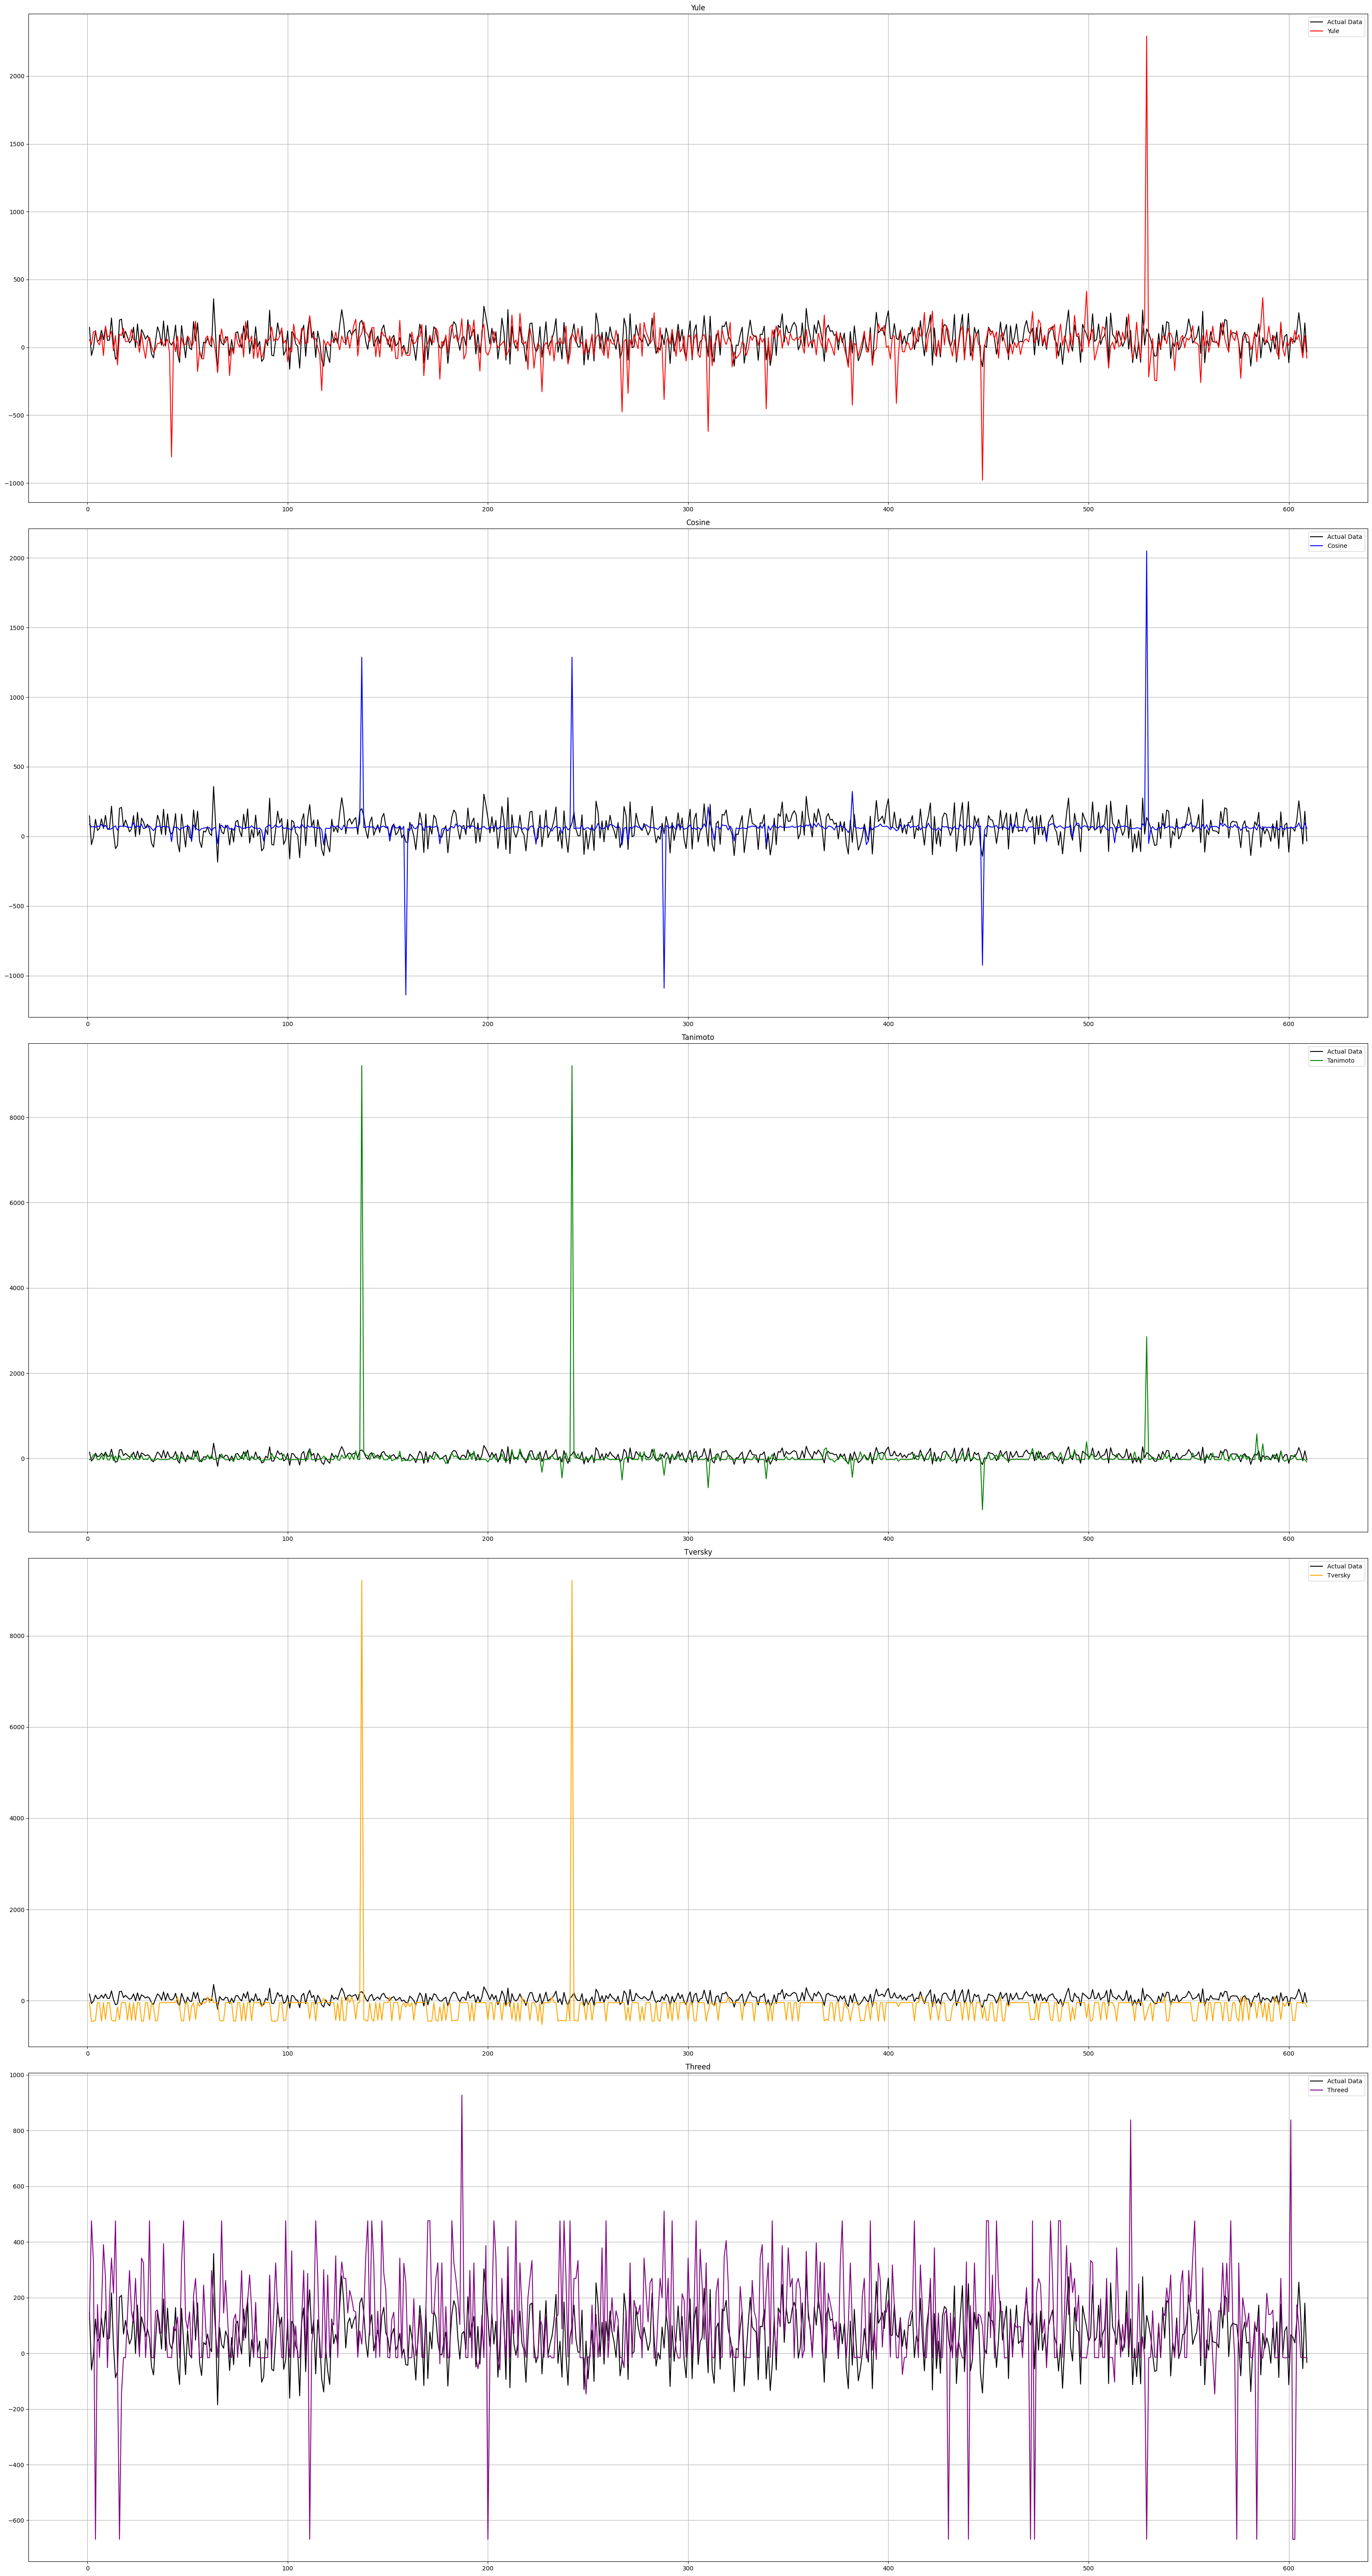

In [16]:
plt.figure(figsize=(32, 60))

# Plot each line in a separate subplot
plt.subplot(511)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_agglo_yule1D, color='red', label='Yule')
plt.legend()
plt.grid(True) 
plt.title('Yule')

plt.subplot(512)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_agglo_cosine1D, color='blue', label='Cosine')
plt.legend()
plt.grid(True)
plt.title('Cosine')

plt.subplot(513)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_agglo_tanimoto1D, color='green', label='Tanimoto')
plt.legend()
plt.grid(True)
plt.title('Tanimoto')

plt.subplot(514)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_agglo_tversky1D, color='orange', label='Tversky')
plt.legend()
plt.grid(True)
plt.title('Tversky')

plt.subplot(515)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_agglo_threed1D, color='purple', label='Threed')
plt.legend()
plt.grid(True)
plt.title('Threed')

plt.tight_layout()

plt.show()